In [ ]:
import pandas as pd # for data manipulation
import matplotlib.pylab as plt  # for data visualization

In [ ]:
data = pd.read_csv(<'Path of the Dataset\\AutoInsurance.csv'>)

In [ ]:
data.info() # checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
data.isna().sum() # checking null values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [ ]:
data.head() # Checking the data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df=data.iloc[:,2:] # excluding Customer & State columns, these being nominal columns

In [ ]:
# Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
# Applying normalization to the designated columns
df_norm = norm_func(df.iloc[:,[0,7,10,11,12,13,14,19]])

In [ ]:
# Create dummy variables
df_dummy = pd.get_dummies(df, drop_first = True)
# we have created dummies for all categorical columns

In [ ]:
df_1 = pd.concat((df_norm,df_dummy),axis=1)

In [ ]:
df_1.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value,Income,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,2763.519279,56274,...,0,0,0,0,0,0,0,1,1,0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,6979.535903,0,...,0,0,0,0,0,0,0,0,1,0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,12887.431650,48767,...,0,0,0,0,0,0,0,1,1,0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,7645.861827,0,...,0,1,0,0,0,1,0,0,1,0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,2813.692575,43836,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_1.describe().T # Checking statistical dimensions of the data & transposing for better visualization

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
Income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
Monthly Premium Auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
Months Since Last Claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
Months Since Policy Inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
...,...,...,...,...,...,...,...,...
Vehicle Class_SUV,9134.0,0.196628,0.397470,0.0,0.000000,0.000000,0.000000,1.0
Vehicle Class_Sports Car,9134.0,0.052989,0.224023,0.0,0.000000,0.000000,0.000000,1.0
Vehicle Class_Two-Door Car,9134.0,0.206481,0.404802,0.0,0.000000,0.000000,0.000000,1.0
Vehicle Size_Medsize,9134.0,0.703306,0.456825,0.0,0.000000,1.000000,1.000000,1.0


In [ ]:
import scipy.cluster.hierarchy as sch # calling hierarchical clustering function

In [ ]:
z = sch.linkage(df_1, method = "complete", metric = "euclidean")

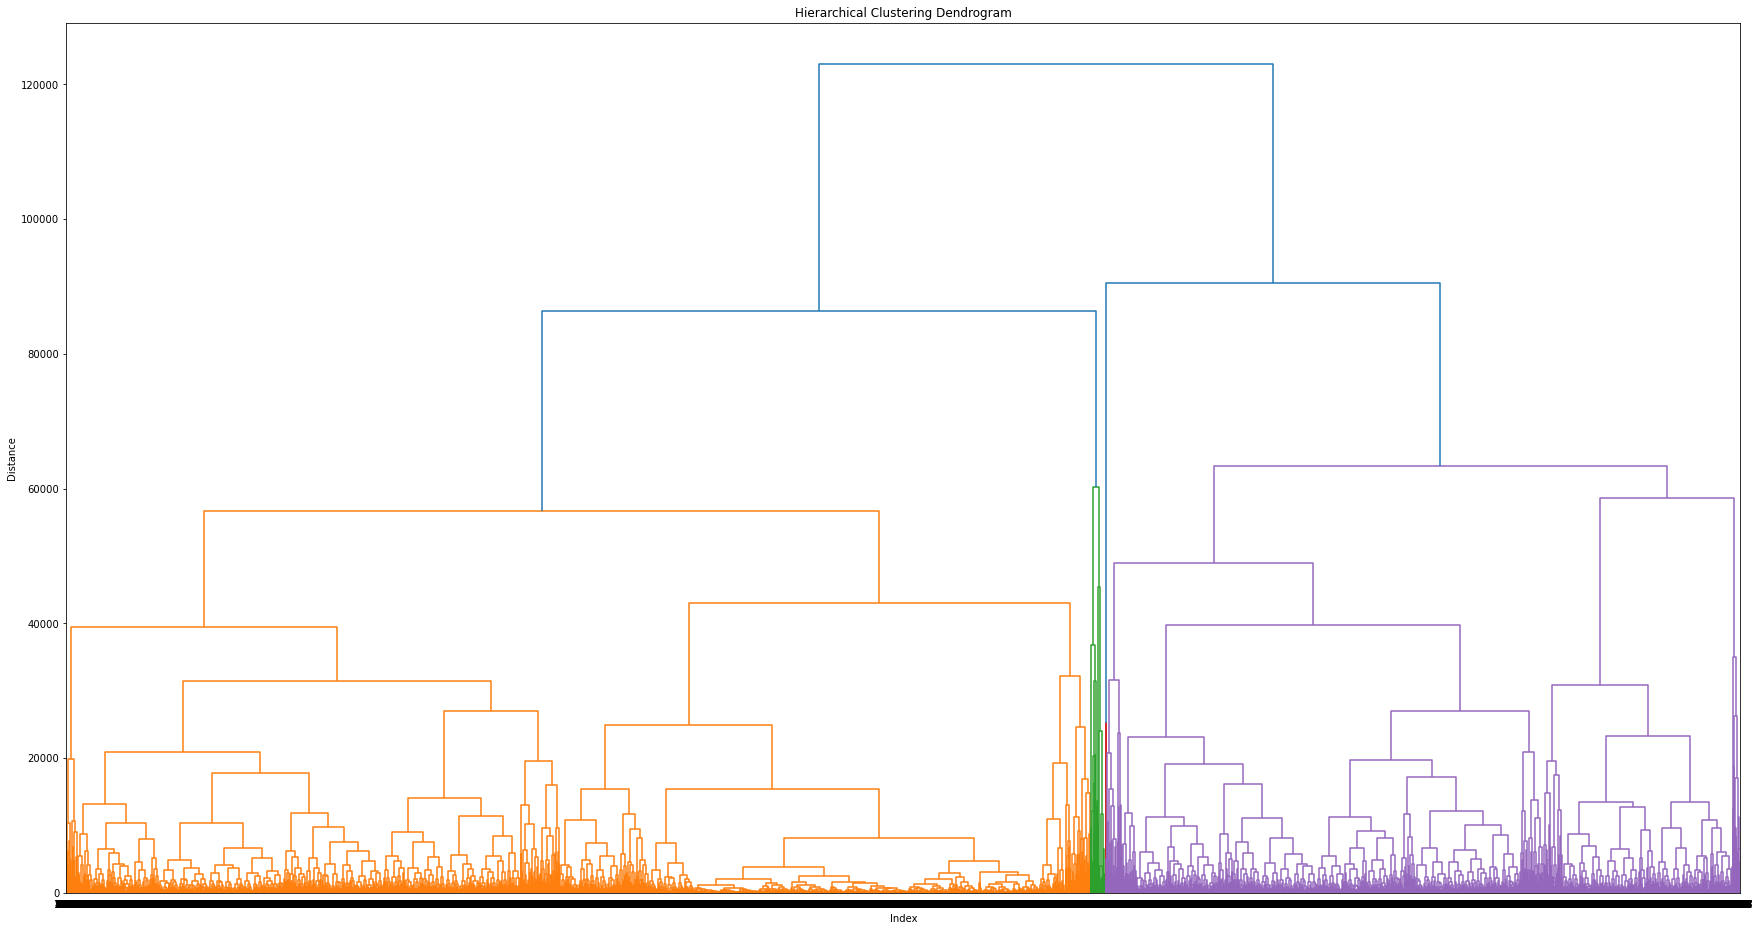

In [ ]:
# Dendrogram
plt.figure(figsize=(30, 16));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
              )
plt.show()

In [ ]:
# Now applying AgglomerativeClustering choosing 4 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = "euclidean").fit(df_1.iloc[:,1:]) 
h_complete.labels_
cluster_labels = pd.Series(h_complete.labels_)

In [ ]:
data['Clust'] = cluster_labels # creating a new column
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Clust
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3


In [ ]:
data1 = data.pop('Clust') #removing the Clust column to rearrange the columns for clusterwise view of the data
data.insert(loc=0, column= 'Cluster', value = data1) # Inserting the column to view the clusterwise data

In [ ]:
# Aggregate mean of each cluster
Insurance_clust = data.iloc[:,3:].groupby(data['Cluster']).mean()
Insurance_clust.T

Cluster,0,1,2,3
Customer Lifetime Value,8019.335076,41488.948159,69799.735067,7495.734413
Income,71028.827556,16817.846154,66196.333333,17268.883384
Monthly Premium Auto,93.295494,142.256410,203.000000,92.429082
Months Since Last Claim,14.826979,15.602564,21.666667,15.253622
Months Since Policy Inception,48.352397,53.166667,40.666667,47.819174
Number of Open Complaints,0.389659,0.320513,0.666667,0.381864
Number of Policies,2.954362,2.000000,2.000000,2.987480
Total Claim Amount,334.314491,877.389481,562.714228,489.616483


In [ ]:
Insurance_cluster = Insurance_clust['Customer Lifetime Value']
Insurance_cluster

Cluster
0     8019.335076
1    41488.948159
2    69799.735067
3     7495.734413
Name: Customer Lifetime Value, dtype: float64

In [ ]:
data['Cluster'].value_counts() # Checking the no.of Customers in each cluster

3    5591
0    3462
1      78
2       3
Name: Cluster, dtype: int64

(-2.2207375357312804,
 2.2009875138537045,
 -2.221050723272701,
 2.2311927106236005)

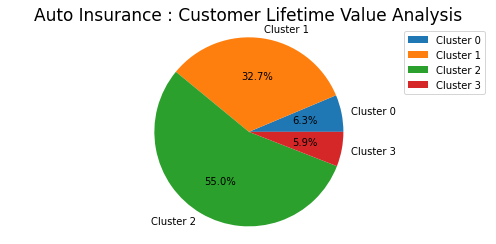

In [ ]:
# Pie chart on the basis of 'Customer Lifetime Value'

labels=['Cluster 0','Cluster 1','Cluster 2','Cluster 3']
Total= Insurance_cluster

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.pie(Total,labels=labels, radius = 2, autopct='%0.1f%%')
plt.title("Auto Insurance : Customer Lifetime Value Analysis", fontsize =17, loc = 'center')
plt.legend( loc="upper right")
plt.axis('equal')

In [ ]:
data.to_csv("AutoInsurance_HClustering.csv", index = False, encoding='utf-8') # creating a csv file with cluster segmentation in csv format

In [ ]:
import os # Checking the path of the csv file created
os.getcwd()

'C:\\Users\\Karuna Singh\\360 DigitMg'